## Método basado en árboles de decisión

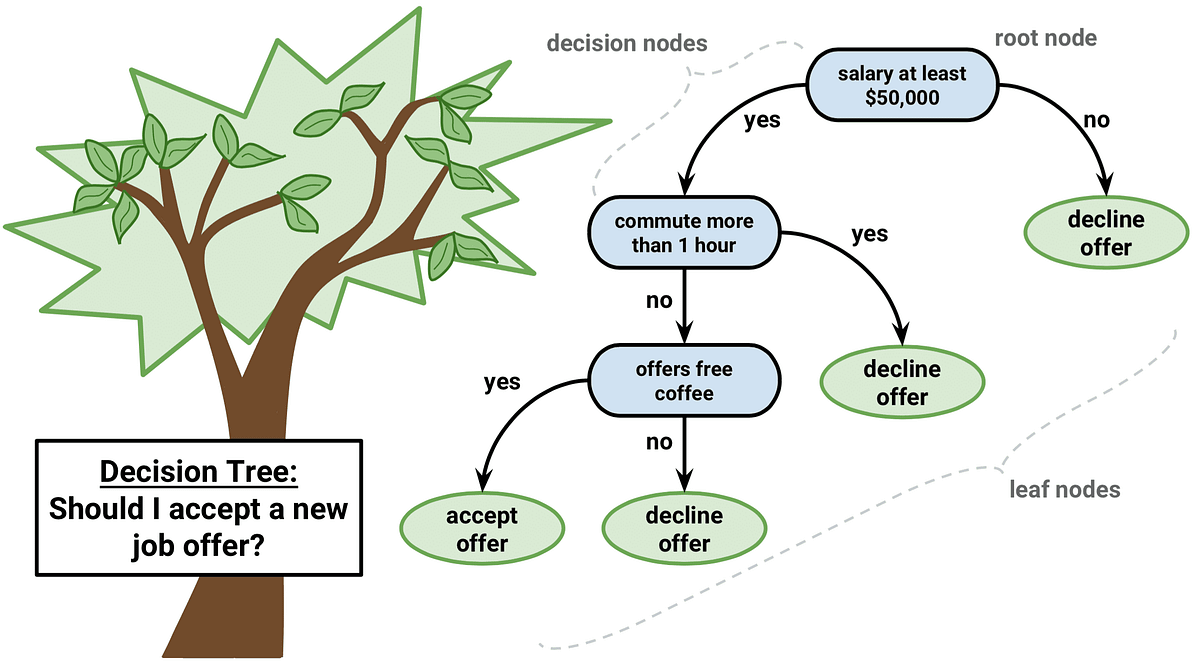

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv')

data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Preprocesamiento y EDA
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [3]:
X = data.drop('Outcome', axis=1) #Matriz de entrada X -> Variables independientes
y = data['Outcome'] #Vector de salida y -> Variable dependiente

# Dividir nuestro conjunto de entrenamiento y validación
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
#Generar el modelo DT
modelo_sel = DecisionTreeClassifier(max_depth=10, random_state=42)
#Entrenar el modelo 
modelo_sel.fit(xtrain, ytrain)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [6]:
importancia_modelo = modelo_sel.feature_importances_
print(f"Importancia de las características - DT: {importancia_modelo}")
print(data.columns)

Importancia de las características - DT: [0.02616881 0.36232205 0.08864696 0.05834196 0.0417352  0.21080908
 0.0917731  0.12020284]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
importancia_features = pd.DataFrame({'Feature':X.columns, 'Importancia':importancia_modelo})
importancia_features = importancia_features.sort_values(by='Importancia', ascending=False)
importancia_features

,Feature,Importancia
1,Glucose,0.362322
5,BMI,0.210809
7,Age,0.120203
6,DiabetesPedigreeFunction,0.091773
2,BloodPressure,0.088647
3,SkinThickness,0.058342
4,Insulin,0.041735
0,Pregnancies,0.026169


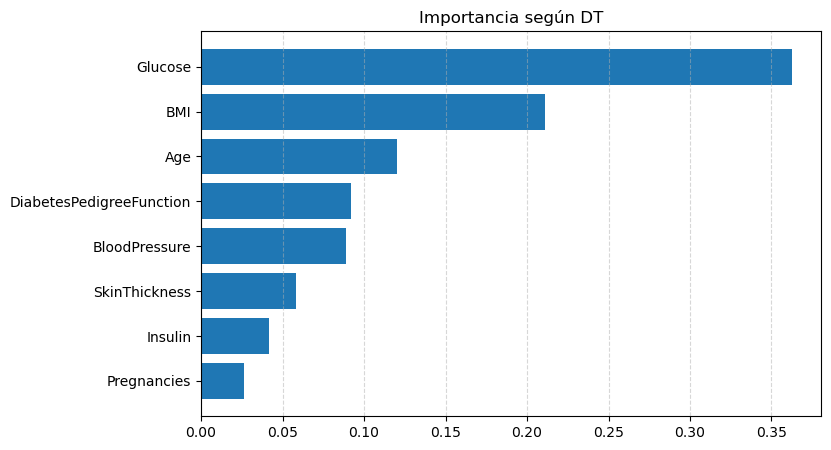

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(importancia_features['Feature'], importancia_features['Importancia'])
plt.title("Importancia según DT")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha = 0.5)
plt.show()

## Método basado en RF
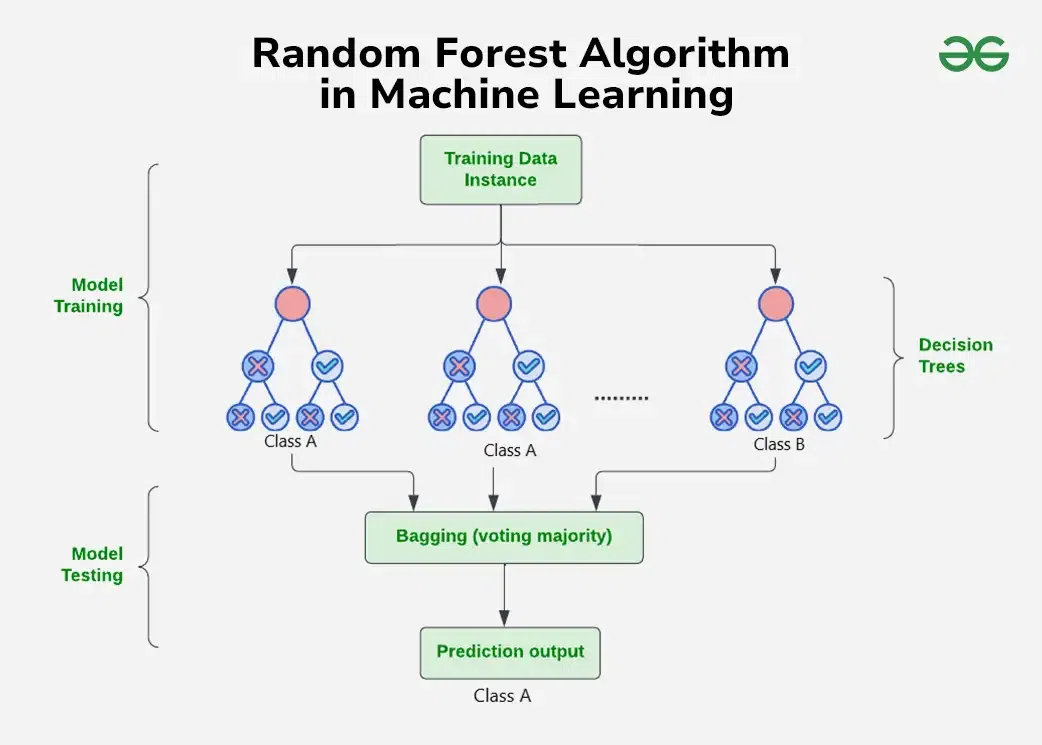

Importancia de las características - DT: [0.07410239 0.28315778 0.08048185 0.06909781 0.07800103 0.1688482
 0.10172543 0.14458551]
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


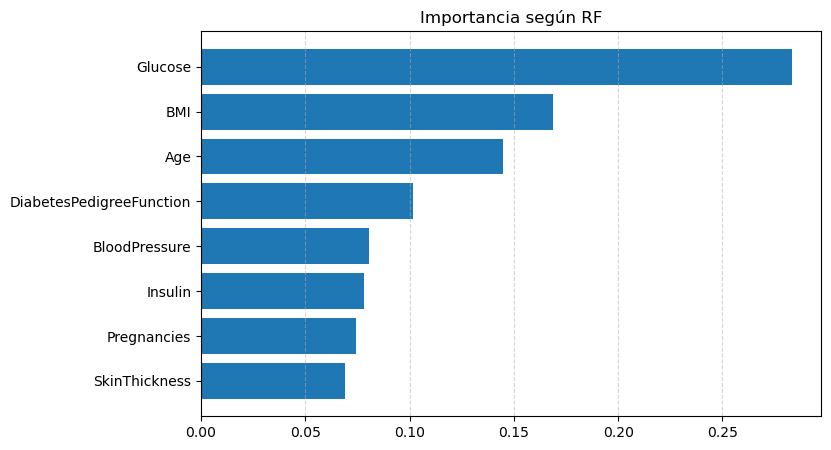

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv')

#Dividimos los datos
X = data.drop('Outcome', axis=1) #Matriz de entrada X -> Variables independientes
y = data['Outcome'] #Vector de salida y -> Variable dependiente

# Dividir nuestro conjunto de entrenamiento y validación
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

#Generar el modelo DT
modelo_sel = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
#Entrenar el modelo 
modelo_sel.fit(xtrain, ytrain)

#Analizamos la importancia para RF
importancia_modelo = modelo_sel.feature_importances_
print(f"Importancia de las características - DT: {importancia_modelo}")
print(data.columns)

importancia_features = pd.DataFrame({'Feature':X.columns, 'Importancia':importancia_modelo})
importancia_features = importancia_features.sort_values(by='Importancia', ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(importancia_features['Feature'], importancia_features['Importancia'])
plt.title("Importancia según RF")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha = 0.5)
plt.show()

## Métodos de Regularización L1 y L2 (Lasso y Ridge)

### Regularización L1 (LASSO)
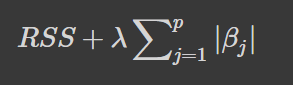

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/refs/heads/master/diabetes.csv')

#Dividimos los datos
X = data.drop('Outcome', axis=1) #Matriz de entrada X -> Variables independientes
y = data['Outcome'] #Vector de salida y -> Variable dependiente

# Dividir nuestro conjunto de entrenamiento y validación
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicamos el método de regularización L1
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(xtrain, ytrain)


Lasso(alpha=0.01, random_state=42)

In [18]:
coef_lasso = lasso.coef_
coef_lasso

array([ 0.00742181,  0.00584946, -0.00168199,  0.        , -0.00011716,
        0.01614449,  0.        ,  0.00646675])

In [19]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [33]:
importancia_features = pd.DataFrame({'Feature':X.columns, 'Coeficientes_Lasso':coef_lasso})
importancia_features

,Feature,Coeficientes_Lasso
0,Pregnancies,0.007422
1,Glucose,0.005849
2,BloodPressure,-0.001682
3,SkinThickness,0.000000
4,Insulin,-0.000117
5,BMI,0.016144
6,DiabetesPedigreeFunction,0.000000
7,Age,0.006467


In [34]:
importancia_features.Coeficientes_Lasso

0    0.007422
1    0.005849
2   -0.001682
3    0.000000
4   -0.000117
5    0.016144
6    0.000000
7    0.006467
Name: Coeficientes_Lasso, dtype: float64

In [ ]:
importancia_features = importancia_features.reindex(importancia_features.Coeficientes_Lasso.abs().sort_values(ascending=False).index)
importancia_features

,Feature,Coeficientes_Lasso
5,BMI,0.016144
0,Pregnancies,0.007422
7,Age,0.006467
1,Glucose,0.005849
2,BloodPressure,-0.001682
4,Insulin,-0.000117
3,SkinThickness,0.000000
6,DiabetesPedigreeFunction,0.000000


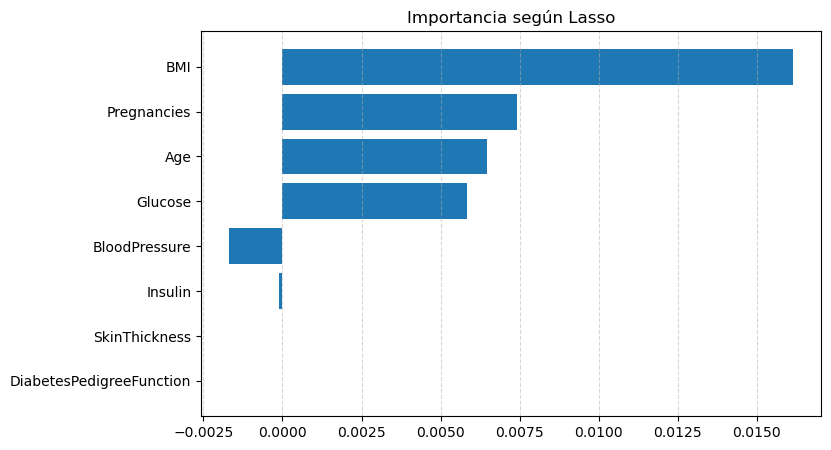

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(importancia_features['Feature'], importancia_features['Coeficientes_Lasso'])
plt.title("Importancia según Lasso")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha = 0.5)
plt.show()

Nos quedamos solo con los valores positivos